In [5]:
%load_ext autoreload
%autoreload 2
# Need to back up to a prior version of numpy to make pandas work, might need to do 
### %!python -m pip install numpy==1.26.4;
### python -m pip install pandas==2.1.1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/smichalka/Documents/Teaching/canvas_scripting/.venv/bin/python: can't open file '/Users/smichalka/Documents/Teaching/canvas_scripting/pip': [Errno 2] No such file or directory


In [11]:
import numpy
import create_figures 
import warnings
import matplotlib as plt
from constants import STUDENT_REPORT_CSV, GPT_OUTPUT_CSV
import get_all_reports

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Get all Data from Canvas
Run the following cell to pull data from Canvas and generate all the CSVs that are needed to create the subplots. This will also automatically generate the GPT summaries for assignments. Only run this cell if you need to pull data from Canvas - it will likely take several minutes to run.

In [7]:
get_all_reports.main()

In [8]:
# convert csvs to dataframes and display report
warnings.filterwarnings('ignore')
report = create_figures.create_dataframe(STUDENT_REPORT_CSV)
gpt_summaries = create_figures.create_dataframe(GPT_OUTPUT_CSV)
display(report)

,name,id,Check all that apply:\n(Your responses to this question will help us make decisions about what we do in class.)\n,Please detail any concepts or technical content you are still confused by or something you found interesting to learn.,Please select the response that best captures your engagement on this assignment.,Please upload a copy of your work for the assignment in pdf format.,How much time (in hours) did you spend on this assignment?,Quiz Grade,Assignment,Please summarize the contents of this homework and detail any concepts or technical content you are still confused by.,Please upload the work you did in pdf format.
0,Ian Walsh,1330,I am still struggling with this section.,kl,"Attempted all exercises, consulted resources, ...",SZLLW-INFOCOM21p.pdf,3-5,10.0,Homework 1,NaN,NaN
1,Ian Walsh,1330,I am still struggling with this section.,NaN,Didn't do anything on this assignment.,NaN,6-8,25.0,Homework 6,asdfasdf,LSD Architecture-1 (1).pdf
2,Diana Garcia,1041,I am still struggling with this section.,NaN,"Attempted all exercises\, consulted resources\...",NaN,3-5,60.0,Homework 6,You know billy elish is a really good artist.,NaN
3,Diana Garcia,1041,I discussed/checked the solutions with my peer...,NaN,"Attempted majority of exercises, some consulti...",NaN,9-11,25.0,Homework 2,You are my sunshine my only sunshine. You make...,NaN


### Look at Specific Assignment
Set the `assignment` variable to the homework assignment you want to look at. The format should be "Homework <#>". These subplots give you a general sense of how much time students spent on the assignment and how well they did on the quiz for this homework assignment. The summary is automatically generated by ChatGPT based on their responses to the assignment survey.

There are not enough relevant responses or data to provide a good summary of the survey feedback on the homework assignment. Please gather more responses from students specifically addressing the homework content and any areas of confusion they may have.


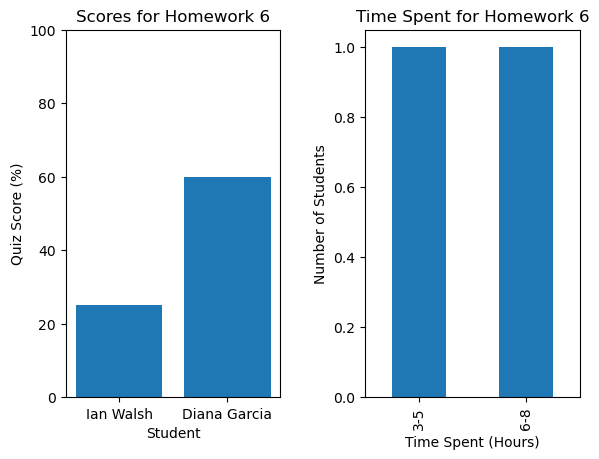

In [11]:
assignment = "Homework 6"

assignment_fig, assignment_axs = plt.subplots(ncols=2, nrows=1)
assignment_fig.tight_layout(pad=3.0)
create_figures.student_vs_score(report, assignment, assignment_axs[0])
create_figures.student_vs_time(report, assignment, assignment_axs[1])
gpt_summary = create_figures.get_summary(gpt_summaries, assignment)
print(gpt_summary)

### Look at Student Performance Across Assignments
Look at student performance over time. The first cell generates two subplots (quiz scores and time spent on the assignment) that graph a random sample of students. The size of the sample is set by the `num_students` variable.

The second cell plots the same data for one specified student, set by the `student` variable. 

The third cell plots the average quiz scores and time spent across assignments.

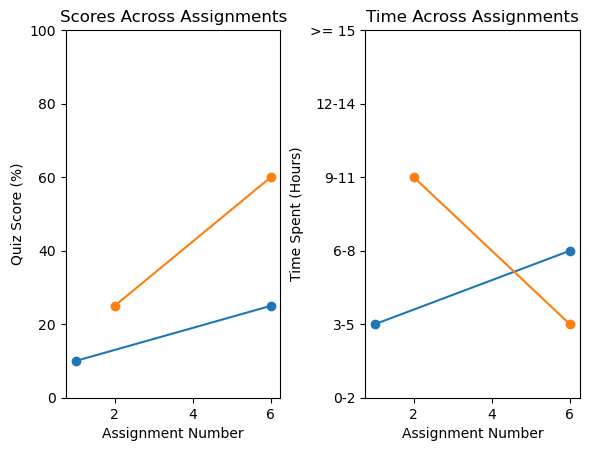

In [12]:
num_students = 2
multi_fig, multi_axs = plt.subplots(ncols=2, nrows=1)
multi_fig.tight_layout(pad=3.0)
create_figures.assignment_vs_score(report, num_students, multi_axs[0])    # make these the same students
create_figures.assignment_vs_time(report, num_students, multi_axs[1])

Text(0.5, 0.98, 'Data for Diana Garcia')

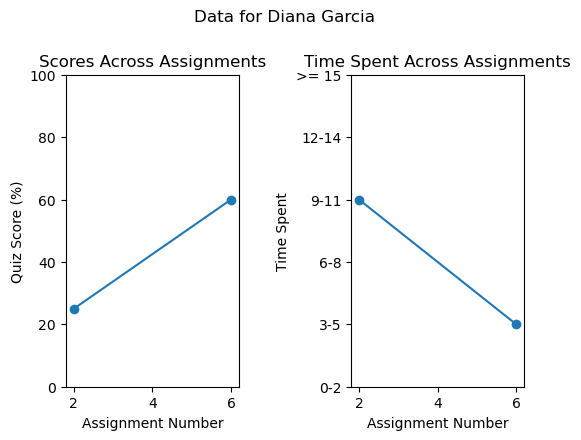

In [13]:
student = "Diana Garcia"
student_fig, student_axs = plt.subplots(ncols=2, nrows=1)
student_fig.tight_layout(pad=5.0)
create_figures.individual_assignment_vs_score(report, student, student_axs[0])
create_figures.individual_assignment_vs_time(report, student, student_axs[1])
student_fig.suptitle(f"Data for {student}")

Text(0.5, 0.98, 'Averages')

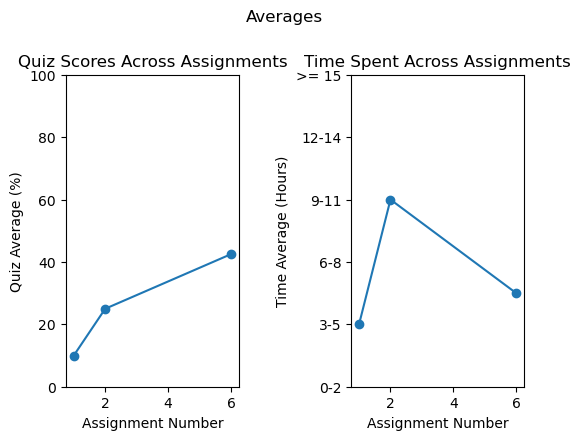

In [14]:
avg_fig, avg_axs = plt.subplots(ncols=2, nrows=1)
avg_fig.tight_layout(pad=5.0)
create_figures.average_assignment_vs_score(report, avg_axs[0])
create_figures.average_assignment_vs_time(report, avg_axs[1])
avg_fig.suptitle("Averages")